In [22]:
# Functions: Analyse the evoltion of average positive and negative
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fun.fun import *

In [71]:
# Filenames
dataset_fn = "../dataset/TweetsCOV19.tsv"
plot_fn = "../images/plots/sentiment_evolution.png"

In [3]:
# -> IN : Load tweets dataframe
tw = get_filtered_tweets_dataframe(dataset_fn)
print("Loaded {:_} tweets".format(len(tw)))
tw.head()

Importing dataset from tsv file ...read 8_077_794 lines (took 39.5s)
Converting timestamp column
Filtering desired columns and between desired dates ... 8_077_794 rows in dataframe
Parsing hashtags and positive/negative sentiments
filtering for tweets that contain hashtags ... 8_077_794 rows in dataframe


,Username,Timestamp,Hashtags,Sentiment_pos,Sentiment_neg
Tweet Id,,,,,
1200928806757752833,83c182d0ee195dc692900d7ff7328171,2019-12-01 00:05:14+00:00,"[rgvwx, rgv, txwx, spi]",1,-2
1200931476642115586,73c3e83574f1eb0a5201c71cf46c732c,2019-12-01 00:15:50+00:00,[KeDezembaBoss],2,-4
1200941770835521536,4efca14ff68aa1edd9aea0c78c615ef2,2019-12-01 00:56:45+00:00,"[fame., FreeBritney]",2,-2
1200948819015454721,a53fd620b4178d04a1d2c4e37e85e0ae,2019-12-01 01:24:45+00:00,[FakeNews],1,-2
1200955132944560135,215a5a37e161f7ceaa0c532e73f62c40,2019-12-01 01:49:51+00:00,[KabukiPolitics],1,-1


In [69]:
# Compute timestamp increment
increments = 100
ts_min, ts_max = min(tw['Timestamp']), max(tw['Timestamp'])
ts_inc = (ts_max - ts_min) / 100
print("Min timestamp:", ts_min)
print("Max timestamp:", ts_max)
print("Timestamp increment:", ts_inc)

Min timestamp: 2019-12-01 00:00:01+00:00
Max timestamp: 2020-02-29 23:59:49+00:00
Timestamp increment: 0 days 21:50:23.880000


In [67]:
# Compute average cumulative sentiment for timestamp increments
ts_bins = [ ts_min + (i+1)*ts_inc for i in range(increments) ]
sen_pos = [ np.mean( tw[tw['Timestamp'] < ts]['Sentiment_pos'] ) for ts in ts_bins ]
sen_neg = [ np.mean( tw[tw['Timestamp'] < ts]['Sentiment_neg'] ) for ts in ts_bins ]

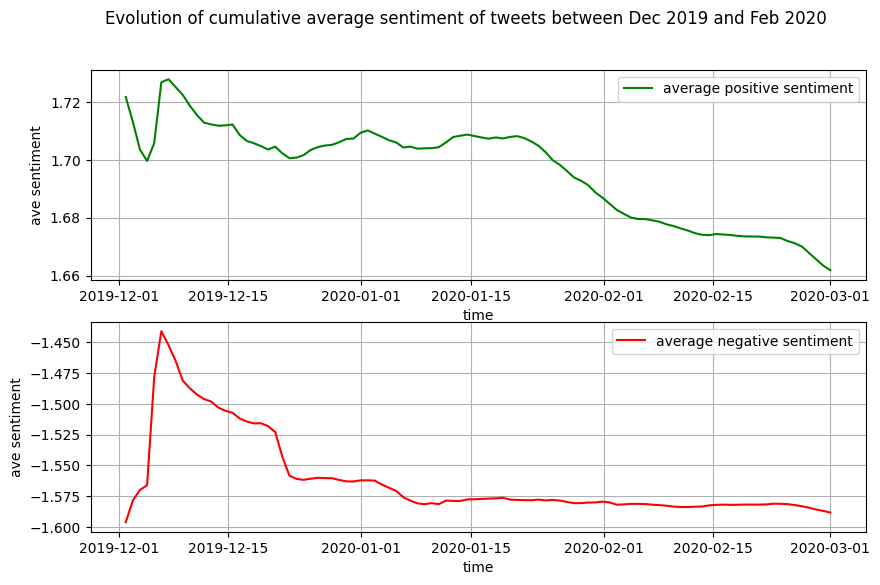

In [74]:
# plot results
fig, ax = plt.subplots(nrows=2, figsize=(10,6))
fig.suptitle("Evolution of cumulative average sentiment of tweets between Dec 2019 and Feb 2020")
ax[0].plot(ts_bins, sen_pos, 'g', label='average positive sentiment')
ax[1].plot(ts_bins, sen_neg, 'r', label='average negative sentiment')
for i in range(2):
    ax[i].legend()
    ax[i].set_xlabel('time')
    ax[i].set_ylabel('ave sentiment')
    ax[i].grid()
plt.savefig(plot_fn)
plt.show()

**Comments on discrepancy:**

Both graphs start out with more 'noisy' data in the beginning, given that they represent fewer tweets and thus greater potential for flucuation. Both graphs also have a trend of becoming more negative: The positive sentiment values get closer to zero and the negative sentimen values get further away from zero (both decrease). However, The positive sentiment has a more pronounced 'cliff' around the latter half of January, where positive sentiments remain fairly level until they plummet. The negative graph seems to start out plummeting (with a marked drop in late December which could coincide with Christmas) and then levels out coming into the new year. 

It is tempting to suggest that the drop in positive sentiment (and the steep drop in the final days of March) are due to the pandemic ramping up. I seem to remember first seeing reporting on the pandemic in January 2020, which could negatively effect positive sentiment. It is perculiar, however, that the negative sentiment was not affected during this time. Also, in the United States the first coronavirus‐related activity restrictions were issued on March 12 2020, after the end of the dataset I am analysing. (Needs work)